# INNOMATICS HACKATHON | 2nd September 2023
### Data Analysis & Machine Learning on Uber rides data recorded between 2009-01-01 and 2015-06-30.

In [31]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("uber_rides_data.xlsx - sample_train.csv")
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.shape

(200000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


In [5]:
df.isna().sum()

ride_id              0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
pd.to_datetime(df['pickup_datetime'])

0        2015-05-07 19:52:06+00:00
1        2009-07-17 20:04:56+00:00
2        2009-08-24 21:45:00+00:00
3        2009-06-26 08:22:21+00:00
4        2014-08-28 17:47:00+00:00
                    ...           
199995   2012-10-28 10:49:00+00:00
199996   2014-03-14 01:09:00+00:00
199997   2009-06-29 00:42:00+00:00
199998   2015-05-20 14:56:25+00:00
199999   2010-05-15 04:08:00+00:00
Name: pickup_datetime, Length: 200000, dtype: datetime64[ns, UTC]

In [11]:
df[df['dropoff_longitude'].isna()]

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [12]:
df.dropna()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


#### Average Fare Amount

In [13]:
average_fare = df['fare_amount'].mean()
print(f"The average fare amount is: {average_fare}")

The average fare amount is: 11.359955250000002


#### Havershine Distance

In [15]:
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

# Calculate Haversine distances and store them in a new column 'haversine_distance'
df['haversine_distance'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Calculate the median Haversine distance
median_haversine_distance = df['haversine_distance'].median()

print(f"The median Haversine distance between pickup and dropoff locations is: {median_haversine_distance} kilometers")


The median Haversine distance between pickup and dropoff locations is: 2.1209923961833708 kilometers


In [18]:
# Find the maximum Haversine distance
max_haversine_distance = df['haversine_distance'].max()

print(f"The maximum Haversine distance between pickup and dropoff locations is: {max_haversine_distance} kilometers")

The maximum Haversine distance between pickup and dropoff locations is: 16409.239135313168 kilometers


In [19]:
# Count the rides with a Haversine distance of 0.0
zero_distance_rides = df[df['haversine_distance'] == 0.0]
count_zero_distance_rides = len(zero_distance_rides)

print(f"The number of rides with a Haversine distance of 0.0 between pickup and dropoff locations is: {count_zero_distance_rides}")

The number of rides with a Haversine distance of 0.0 between pickup and dropoff locations is: 5632


In [20]:
# Calculate the mean fare_amount
mean_fare_for_zero_distance_rides = zero_distance_rides['fare_amount'].mean()

print(f"The mean 'fare_amount' for rides with a Haversine distance of 0.0 is: {mean_fare_for_zero_distance_rides}")


The mean 'fare_amount' for rides with a Haversine distance of 0.0 is: 11.585317826704546


In [23]:
summary_stats = df[['passenger_count', 'haversine_distance']].describe()
print(summary_stats)

       passenger_count  haversine_distance
count    200000.000000       199999.000000
mean          1.684535           20.855350
std           1.385997          382.964642
min           0.000000            0.000000
25%           1.000000            1.215222
50%           1.000000            2.120992
75%           2.000000            3.875169
max         208.000000        16409.239135


Observations

The maximum passenger count is unusually high at 208, which could be an outlier or data error.

The majority of rides have between 1 and 2 passengers, as indicated by the 25th, 50th (median), and 75th percentiles.

#### Max Fare Amount

In [25]:
max_fare_amount = df['fare_amount'].max()
print(f"The maximum 'fare_amount' for a ride is: {max_fare_amount}")

The maximum 'fare_amount' for a ride is: 499.0


In [27]:
# Find the row with the maximum 'fare_amount'
max_fare_ride = df[df['fare_amount'] == df['fare_amount'].max()]

# Extract the coordinates for pickup and dropoff locations
pickup_longitude = max_fare_ride['pickup_longitude'].values[0]
pickup_latitude = max_fare_ride['pickup_latitude'].values[0]
dropoff_longitude = max_fare_ride['dropoff_longitude'].values[0]
dropoff_latitude = max_fare_ride['dropoff_latitude'].values[0]

# Calculate the Haversine distance
distance = haversine(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude)

print(f"The Haversine distance between pickup and dropoff for the costliest ride is: {distance} kilometers")

The Haversine distance between pickup and dropoff for the costliest ride is: 0.0007899213191009994 kilometers


In [28]:
df_sample = df[df['fare_amount'] > 0]
df_sample.shape

(199978, 9)

In [29]:
# Calculate the fare per kilometer by dividing fare_amount by haversine_distance
df_sample['fare_per_km'] = df_sample['fare_amount'] / df_sample['haversine_distance']

C:\Users\tripl\AppData\Local\Temp/ipykernel_17500/1680929793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['fare_per_km'] = df_sample['fare_amount'] / df_sample['haversine_distance']


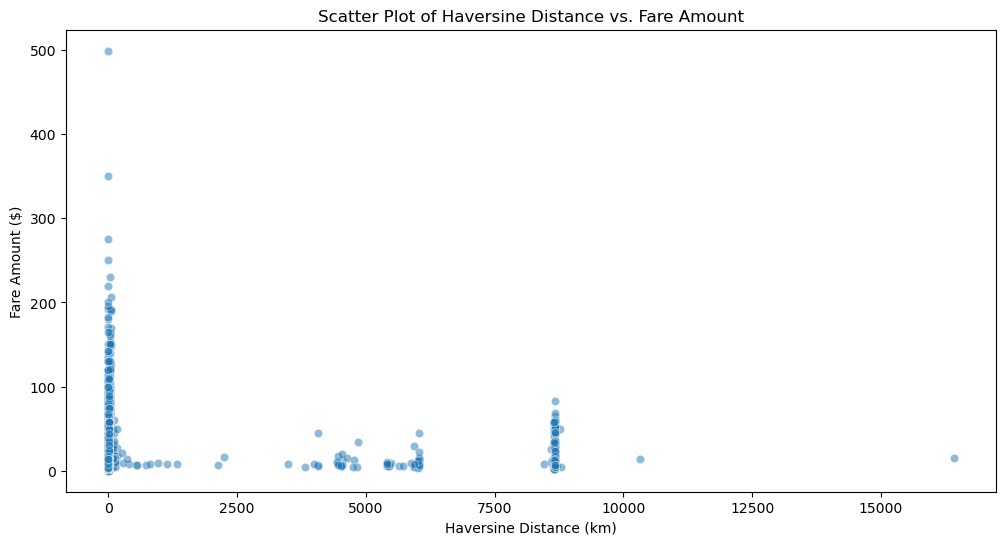

In [32]:
# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_sample, x='haversine_distance', y='fare_amount', alpha=0.5)
plt.title('Scatter Plot of Haversine Distance vs. Fare Amount')
plt.xlabel('Haversine Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.show()
the scatter plot of havershine distance vs fare amount shows that 

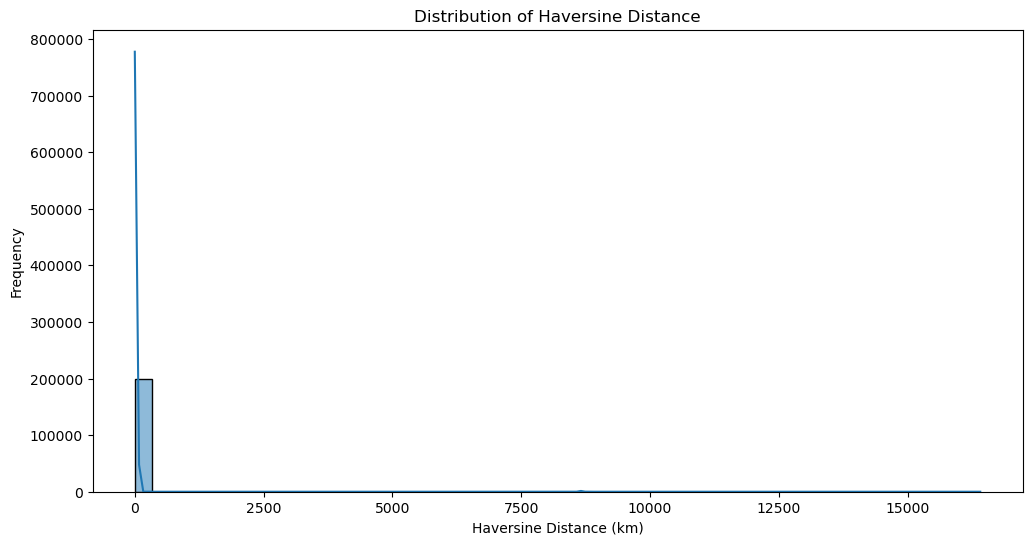

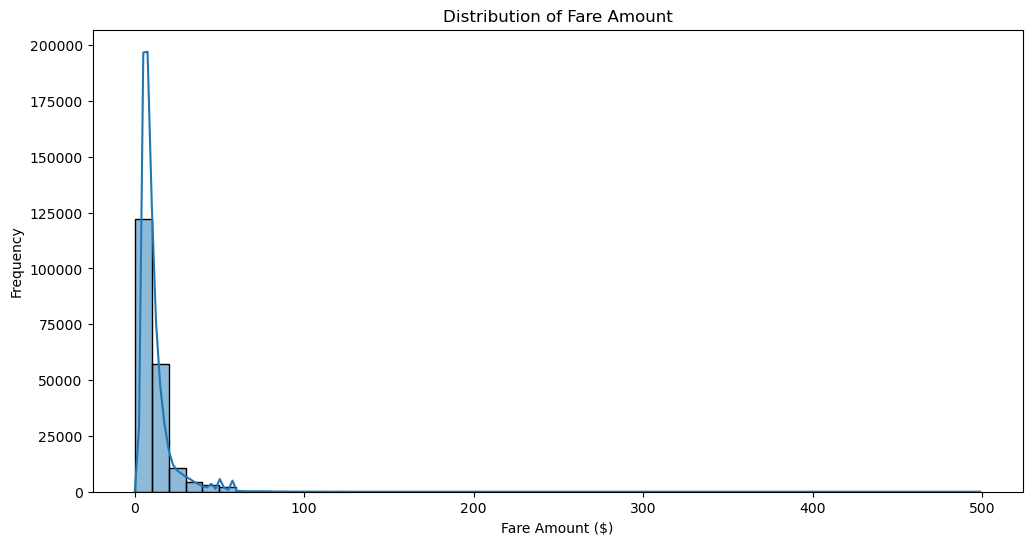

In [34]:
# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(df_sample['haversine_distance'], bins=50, kde=True)
plt.title('Distribution of Haversine Distance')
plt.xlabel('Haversine Distance (km)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_sample['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Calculate correlation between haversine_distance and fare_amount
correlation = df_sample['haversine_distance'].corr(df_sample['fare_amount'])
print(f"Correlation between Haversine Distance and Fare Amount: {correlation:.2f}")

Correlation between Haversine Distance and Fare Amount: 0.03


Obersvations

The correlation of 0.03 indicates that the linear relationship between Haversine Distance and Fare Amount is very weak.
This would mean there could be many other factors influencing the fare amount of a ride, such as time of day, traffic conditions, ride duration, and any pricing surcharges or discounts applied by the ride-sharing service.

#### DateTime

In [39]:
# Convert 'pickup_datetime' column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['pickup_year'] = df['pickup_datetime'].dt.year

# Count the number of rides recorded in the year 2014
rides_in_2014 = df[df['pickup_year'] == 2014].shape[0]

print(f"The number of rides recorded in the year 2014 is: {rides_in_2014}")

The number of rides recorded in the year 2014 is: 29968


In [40]:
df['pickup_quarter'] = df['pickup_datetime'].dt.quarter

# Count the number of rides recorded in the first quarter of 2014 (Q1 2014)
rides_in_q1_2014 = df[(df['pickup_year'] == 2014) & (df['pickup_quarter'] == 1)].shape[0]

print(f"The number of rides recorded in the first quarter of 2014 is: {rides_in_q1_2014}")

The number of rides recorded in the first quarter of 2014 is: 7687


In [41]:
df['pickup_month'] = df['pickup_datetime'].dt.month

# Filter for rides that occurred in September 2010
rides_in_september_2010 = df[(df['pickup_year'] == 2010) & (df['pickup_month'] == 9)]

# Extract the day of the week from 'pickup_datetime' and create a new column 'day_of_week'
rides_in_september_2010['day_of_week'] = rides_in_september_2010['pickup_datetime'].dt.day_name()

# Count the number of rides for each day of the week
day_of_week_counts = rides_in_september_2010['day_of_week'].value_counts()

# Find the day of the week with the maximum number of rides
max_rides_day = day_of_week_counts.idxmax()
max_rides_count = day_of_week_counts.max()

print(f"On {max_rides_day} in September 2010, the maximum number of rides ({max_rides_count} rides) were recorded.")

On Thursday in September 2010, the maximum number of rides (457 rides) were recorded.


C:\Users\tripl\AppData\Local\Temp/ipykernel_17500/2736389650.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides_in_september_2010['day_of_week'] = rides_in_september_2010['pickup_datetime'].dt.day_name()


#### Apply a Machine Learning Algorithm to predict the fare amount 

following input features:
passenger_count, distance and ride_week_day.

Perform a 70-30 split of data.

Which algorithm gives the least adjusted R square value?

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [59]:
df['ride_week_day'] = df['pickup_datetime'].dt.day_name()

In [54]:
df.dropna(inplace=True)
df.shape

(199999, 18)

In [61]:
# One-hot encode the 'ride_week_day' column
df = pd.get_dummies(df, columns=['ride_week_day'], drop_first=True)

# Prepare the input features and target variable
X = df[['passenger_count', 'haversine_distance', 'ride_week_day_Monday', 'ride_week_day_Saturday', 'ride_week_day_Sunday', 'ride_week_day_Thursday', 'ride_week_day_Tuesday', 'ride_week_day_Wednesday']]
y = df['fare_amount']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Calculate R-squared for Linear Regression
r2_linear = r2_score(y_test, y_pred_linear)

# Random Forest Regression
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)
y_pred_rf = random_forest_reg.predict(X_test)

# Calculate R-squared for Random Forest Regression
r2_rf = r2_score(y_test, y_pred_rf)

# Adjusted R-squared for Linear Regression
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()
adj_r2_linear = ols_model.rsquared_adj

# Adjusted R-squared for Random Forest Regression
adj_r2_rf = 1 - (1 - r2_rf) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Compare adjusted R-squared values
print(f"Adjusted R-squared for Linear Regression: {adj_r2_linear:.4f}")
print(f"Adjusted R-squared for Random Forest Regression: {adj_r2_rf:.4f}")

Adjusted R-squared for Linear Regression: 0.0014
Adjusted R-squared for Random Forest Regression: 0.6295


Input

This is a regression task to predict the fare amount based on the input features: passenger_count, distance, and ride_week_day. So We only need Linear Regression and Random Forest Regression